171708.0


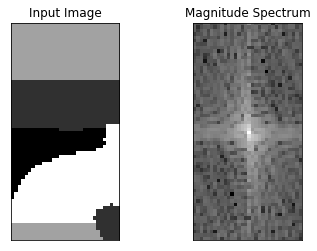

In [3]:
# TRABALHO 3 DE MC920

# ALUNO: Miguel Augusto Silva Guida   RA: 174847


import cv2
import numpy as np
import matplotlib.pyplot as plt


# Funcao que calcula a distancia de um pixel com o centro da imagem.
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Funcao que gera um filtro passa baixa com a frequencia de corte D0.
def filtroPassaBaixaIdeal(D0,imgShape):
    passaBaixa = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                passaBaixa[y,x] = 1
    return passaBaixa

# Funcao que gera um filtro passa alta com a frequencia de corte D0.
def filtroPassaAltaIdeal(D0,imgShape):
    passaAlta = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                passaAlta[y,x] = 0
    return passaAlta

# Funcao que gera um filtro passa faixa com a frequencia de corte D0 e largura de banda W
def filtroPassaFaixaIdeal(D0, W,imgShape):
    passaFaixa = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y,x),center)
            if (dist < D0 - W/2) | (dist > D0 + W/2):
                passaFaixa[y,x] = 0
    return passaFaixa



img = cv2.imread('rgb1.png', 0)
#img = cv2.imread('butterfly.png', 0)

#Calcula FFT da imagem e translada a componente de frequencia zero para o centro.
f = np.fft.fft2(img)

#f[np.abs(f) < 1000] = 0

fshift = np.fft.fftshift(f)

print(np.max(np.abs(f)))


# Obtem o espectro original da imagem
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1)

cv2.imwrite('magnitude_spectrum.png', magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()





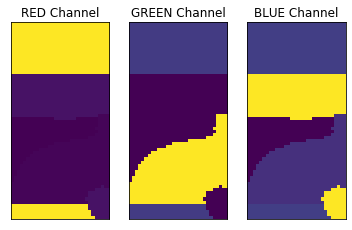

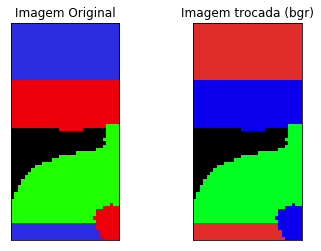

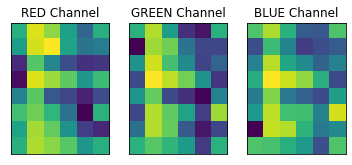

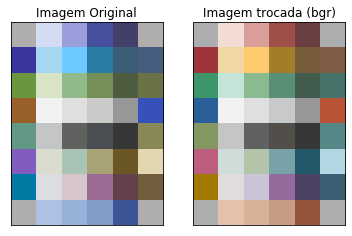

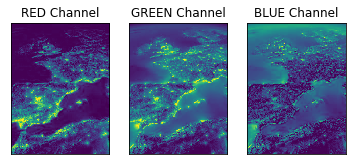

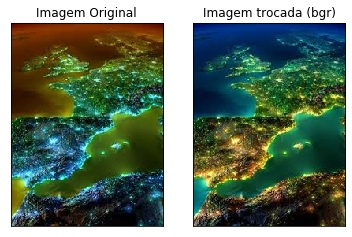

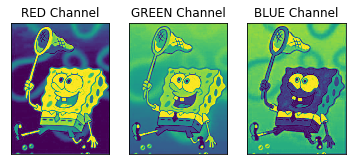

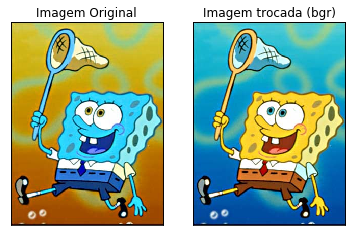

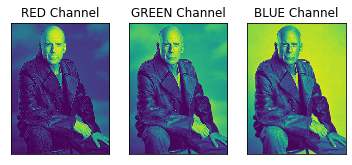

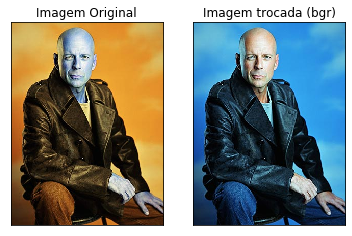

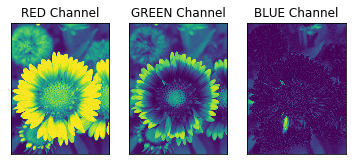

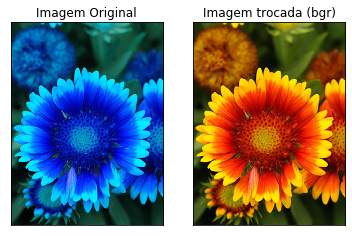

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#The obvious approach
def showRGBChannels(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     print("imagem Original")
#     print(img)
    red,green,blue = cv2.split(img)

#     print(red)
#     print(blue)
#     print(green)
    plt.subplot(131),plt.imshow(red)
    plt.title('RED Channel'), plt.xticks([]), plt.yticks([])

    plt.subplot(132),plt.imshow(green)
    plt.title('GREEN Channel'), plt.xticks([]), plt.yticks([])

    plt.subplot(133),plt.imshow(blue)
    plt.title('BLUE Channel'), plt.xticks([]), plt.yticks([])
    plt.show()
    
def swapRGBtoBGR(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    red,green,blue = cv2.split(img)
    im_rgb = cv2.merge( (blue, green, red))

    plt.subplot(121),plt.imshow(img)
    plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122),plt.imshow(im_rgb)
    plt.title('Imagem trocada (bgr)'), plt.xticks([]), plt.yticks([])
    
    plt.show()
    
    
img = cv2.imread("rgb1.png")
showRGBChannels(img)
swapRGBtoBGR(img)
img = cv2.imread("rgb2.png")
showRGBChannels(img)
swapRGBtoBGR(img)
img = cv2.imread("image1.jpeg")
showRGBChannels(img)
swapRGBtoBGR(img)
img = cv2.imread("image2.jpg")
showRGBChannels(img)
swapRGBtoBGR(img)
img = cv2.imread("image3.jpg")
showRGBChannels(img)
swapRGBtoBGR(img)
img = cv2.imread("image4.jpg")
showRGBChannels(img)
swapRGBtoBGR(img)







#Manual Approach
# red = img[:,:,2]
# blue = img[:,:,0]

# img[:,:,0] = red
# img[:,:,2] = blue








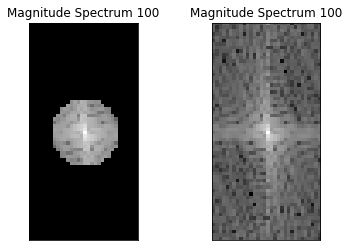

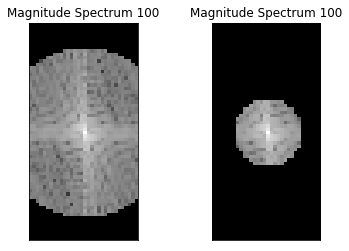

True

In [3]:
# FILTROS PASSA BAIXA IDEAL

#cria os filtros passa baixa com D0 = 50, 25, 15, 10, 5
passaBaixa5 = filtroPassaBaixaIdeal(5,img.shape)
passaBaixa50 = filtroPassaBaixaIdeal(50,img.shape)
passaBaixa25 = filtroPassaBaixaIdeal(25,img.shape)
passaBaixa15 = filtroPassaBaixaIdeal(15,img.shape)
passaBaixa10 = filtroPassaBaixaIdeal(10,img.shape)

# Aplica os filtros passa baixa no dominio de frequencia da imagem
fshift5 = fshift * passaBaixa5
fshift50 = fshift * passaBaixa50
fshift25 = fshift * passaBaixa25
fshift15 = fshift * passaBaixa15
fshift10 = fshift * passaBaixa10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum5 = 20*np.log(np.abs(fshift5)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum15 = 20*np.log(np.abs(fshift15)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumPB5.png', magnitude_spectrum5)
cv2.imwrite('spectrumPB50.png', magnitude_spectrum50)
cv2.imwrite('spectrumPB25.png', magnitude_spectrum25)
cv2.imwrite('spectrumPB15.png', magnitude_spectrum15)
cv2.imwrite('spectrumPB10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum5, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift5 = np.fft.ifftshift(fshift5)
img_back5 = np.fft.ifft2(f_ishift5)
img_back5 = np.real(img_back5)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift15 = np.fft.ifftshift(fshift15)
img_back15 = np.fft.ifft2(f_ishift15)
img_back15 = np.real(img_back15)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_back5.png', img_back5)
cv2.imwrite('img_back50.png', img_back50)
cv2.imwrite('img_back25.png', img_back25)
cv2.imwrite('img_back15.png', img_back15)
cv2.imwrite('img_back10.png', img_back10)
